# Previsão de Volume de Tickets Mensais

Este notebook implementa um modelo de previsão para o volume de tickets mensais com base em dados históricos. Utilizamos Random Forest como algoritmo principal devido à sua capacidade de capturar padrões não-lineares e lidar bem com múltiplas variáveis.

## 1. Carregamento e Visualização dos Dados

In [ ]:
# Importação das bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Carregamento dos dados
df = pd.read_csv('dados_historicos_tickets.csv')
df['data'] = pd.to_datetime(df['data'])
df.set_index('data', inplace=True)

# Exibição dos primeiros registros
print("Resumo dos dados:")
df.head()

Resumo dos dados:


,tickets,usuarios_ativos,feriados,campanhas_marketing,tickets_previos,dias_uteis
data,,,,,,
2022-01-01,423,15200,2,1,398,21
2022-02-01,385,15350,0,0,423,20
2022-03-01,412,15600,0,0,385,23
2022-04-01,390,15800,2,0,412,19
2022-05-01,456,16100,1,1,390,22


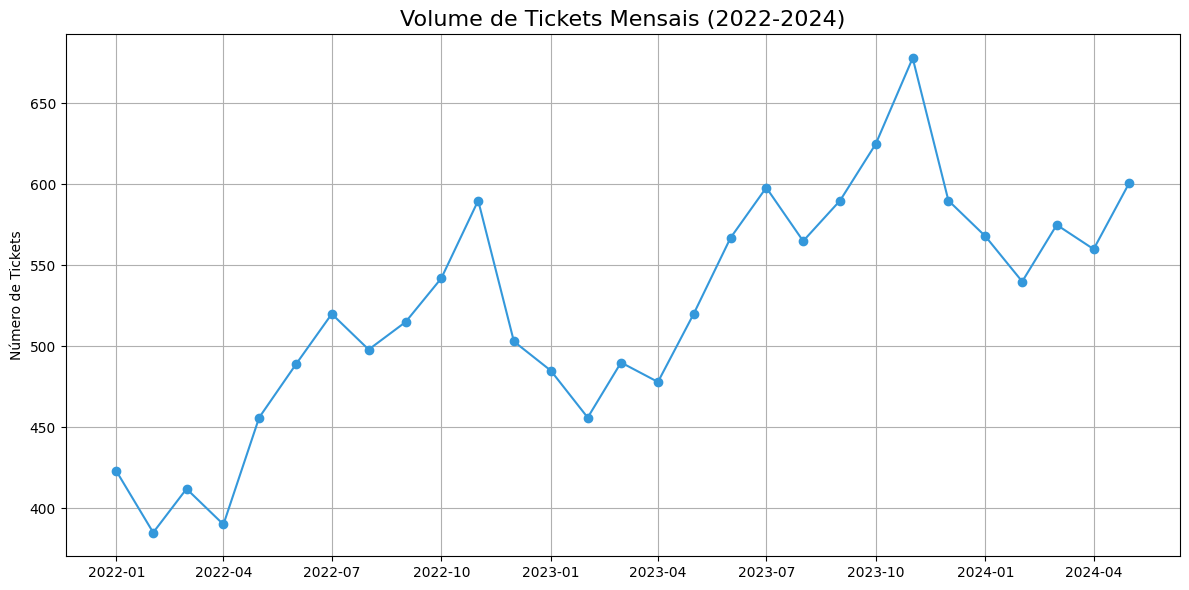

Estatísticas descritivas:


,tickets,usuarios_ativos,feriados,campanhas_marketing,tickets_previos,dias_uteis
count,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000
mean,524.448276,19196.551724,1.241379,0.965517,517.448276,21.206897
std,71.923862,2684.044491,0.912421,0.680481,74.054317,1.292266
min,385.000000,15200.000000,0.000000,0.000000,385.000000,19.000000
25%,485.000000,17000.000000,1.000000,1.000000,478.000000,20.000000
50%,520.000000,18800.000000,1.000000,1.000000,520.000000,21.000000
75%,575.000000,21500.000000,2.000000,1.000000,568.000000,22.000000
max,678.000000,23900.000000,3.000000,2.000000,678.000000,23.000000


In [9]:

# Configuração de visualização
#plt.style.use('seaborn')
#sns.set(font_scale=1.2)

# Visualização da série temporal de tickets
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['tickets'], marker='o', linestyle='-', color='#3498db')
plt.title('Volume de Tickets Mensais (2022-2024)', fontsize=16)
plt.ylabel('Número de Tickets')
plt.grid(True)
plt.tight_layout()
plt.show()

# Estatísticas descritivas
print("Estatísticas descritivas:")
df.describe()

## 2. Análise Exploratória

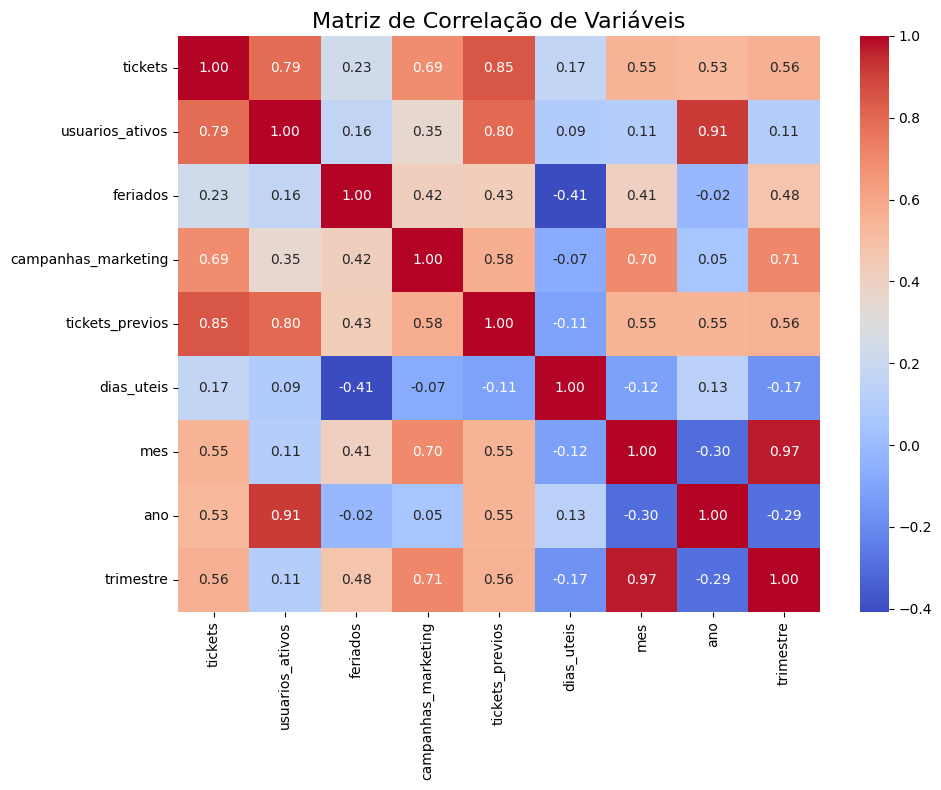

In [10]:
# Extrair características temporais
df['mes'] = df.index.month
df['ano'] = df.index.year
df['trimestre'] = df.index.quarter

# Matriz de correlação
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlação de Variáveis', fontsize=16)
plt.tight_layout()
plt.show()

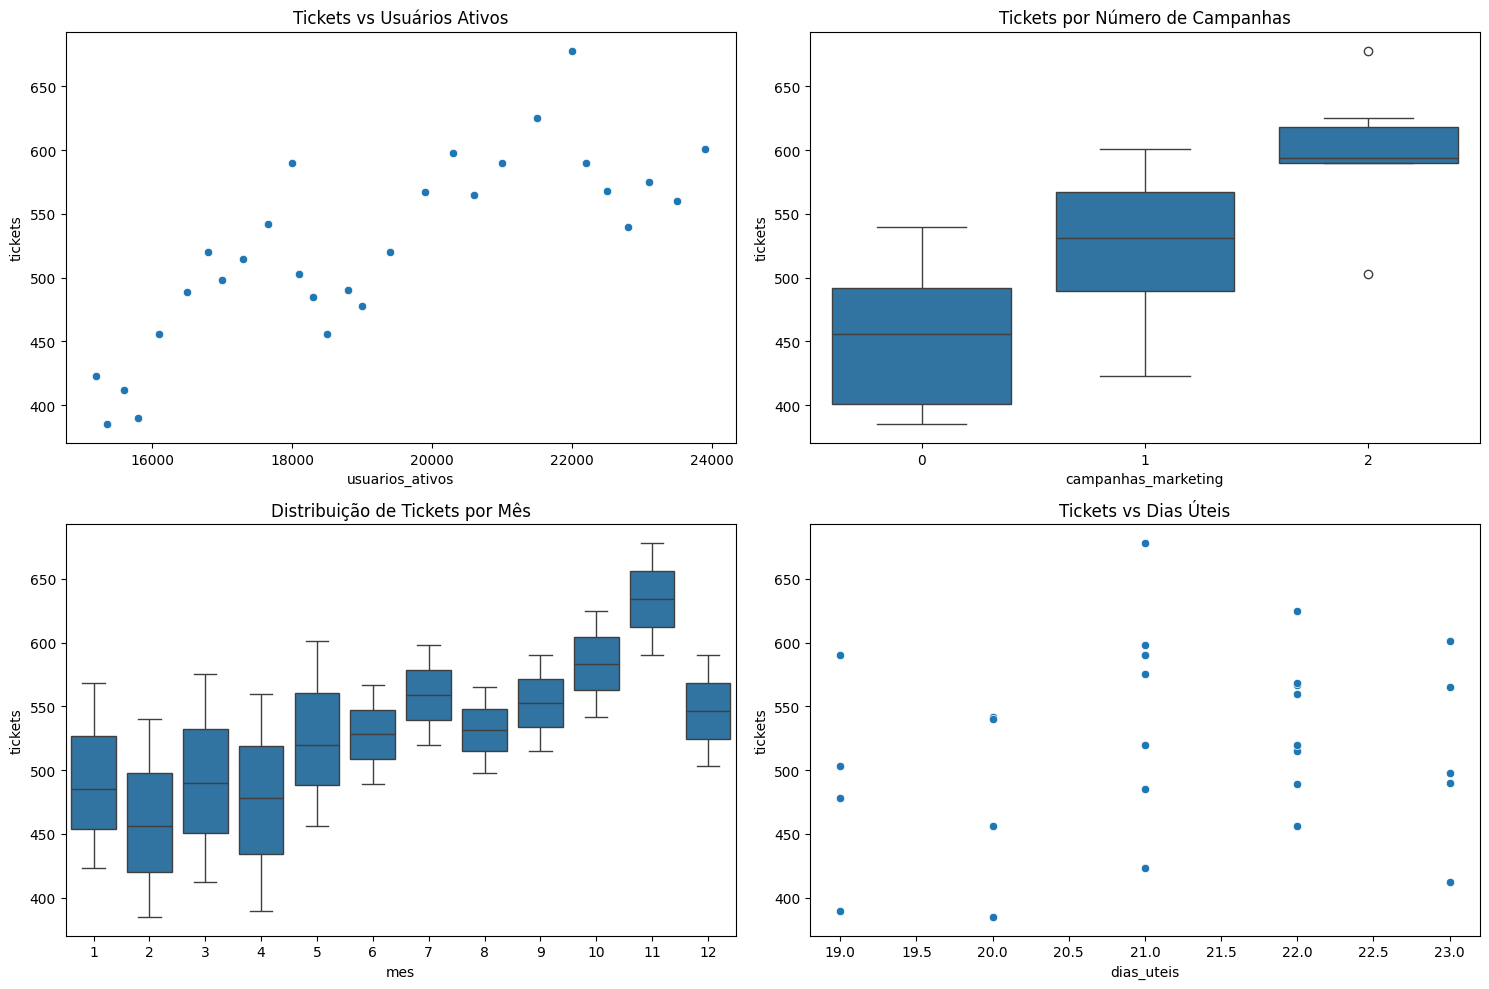

In [11]:
# Visualização da relação entre variáveis
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Tickets vs Usuários Ativos
sns.scatterplot(x='usuarios_ativos', y='tickets', data=df, ax=axes[0, 0])
axes[0, 0].set_title('Tickets vs Usuários Ativos')

# Tickets vs Campanhas de Marketing
sns.boxplot(x='campanhas_marketing', y='tickets', data=df, ax=axes[0, 1])
axes[0, 1].set_title('Tickets por Número de Campanhas')

# Tickets vs Mês
sns.boxplot(x='mes', y='tickets', data=df, ax=axes[1, 0])
axes[1, 0].set_title('Distribuição de Tickets por Mês')

# Tickets vs Dias Úteis
sns.scatterplot(x='dias_uteis', y='tickets', data=df, ax=axes[1, 1])
axes[1, 1].set_title('Tickets vs Dias Úteis')

plt.tight_layout()
plt.show()

## 3. Preparação dos Dados

In [12]:
# Engenharia de características
# Transformar variáveis categóricas em one-hot encoding
df_model = pd.get_dummies(df, columns=['mes', 'trimestre'], drop_first=True)

# Definir features e target
X = df_model.drop('tickets', axis=1)
y = df_model['tickets']

# Divisão em conjuntos de treino e teste (80% treino, 20% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Tamanho do conjunto de treino: {X_train.shape}")
print(f"Tamanho do conjunto de teste: {X_test.shape}")

Tamanho do conjunto de treino: (23, 20)
Tamanho do conjunto de teste: (6, 20)


## 4. Treinamento do Modelo Random Forest

In [13]:
# Inicialização e treinamento do modelo Random Forest
rf_model = RandomForestRegressor(n_estimators=100, 
                                 max_depth=None, 
                                 min_samples_split=2, 
                                 min_samples_leaf=1, 
                                 random_state=42)

# Treinamento do modelo
rf_model.fit(X_train, y_train)

# Avaliação no conjunto de treinamento
y_train_pred = rf_model.predict(X_train)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
train_mae = mean_absolute_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

print("Métricas no conjunto de treinamento:")
print(f"RMSE: {train_rmse:.2f}")
print(f"MAE: {train_mae:.2f}")
print(f"R²: {train_r2:.4f}")

Métricas no conjunto de treinamento:
RMSE: 12.44
MAE: 10.68
R²: 0.9696


Métricas no conjunto de teste:
RMSE: 42.66
MAE: 32.12
R²: 0.5231


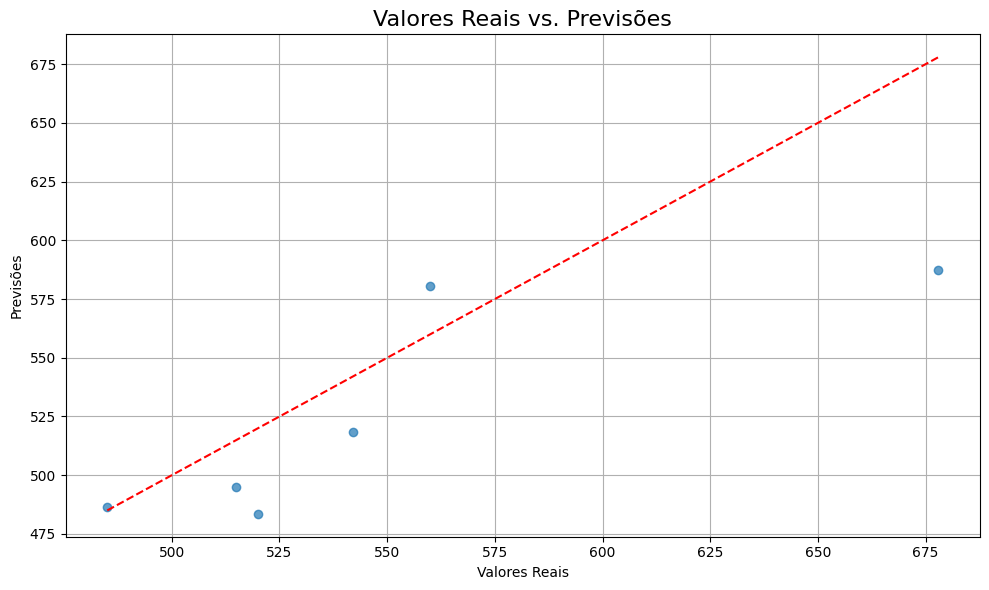

In [14]:
# Avaliação no conjunto de teste
y_pred = rf_model.predict(X_test)
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
test_mae = mean_absolute_error(y_test, y_pred)
test_r2 = r2_score(y_test, y_pred)

print("Métricas no conjunto de teste:")
print(f"RMSE: {test_rmse:.2f}")
print(f"MAE: {test_mae:.2f}")
print(f"R²: {test_r2:.4f}")

# Visualização das previsões vs valores reais
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Valores Reais')
plt.ylabel('Previsões')
plt.title('Valores Reais vs. Previsões', fontsize=16)
plt.grid(True)
plt.tight_layout()
plt.show()

## 5. Análise da Importância das Variáveis

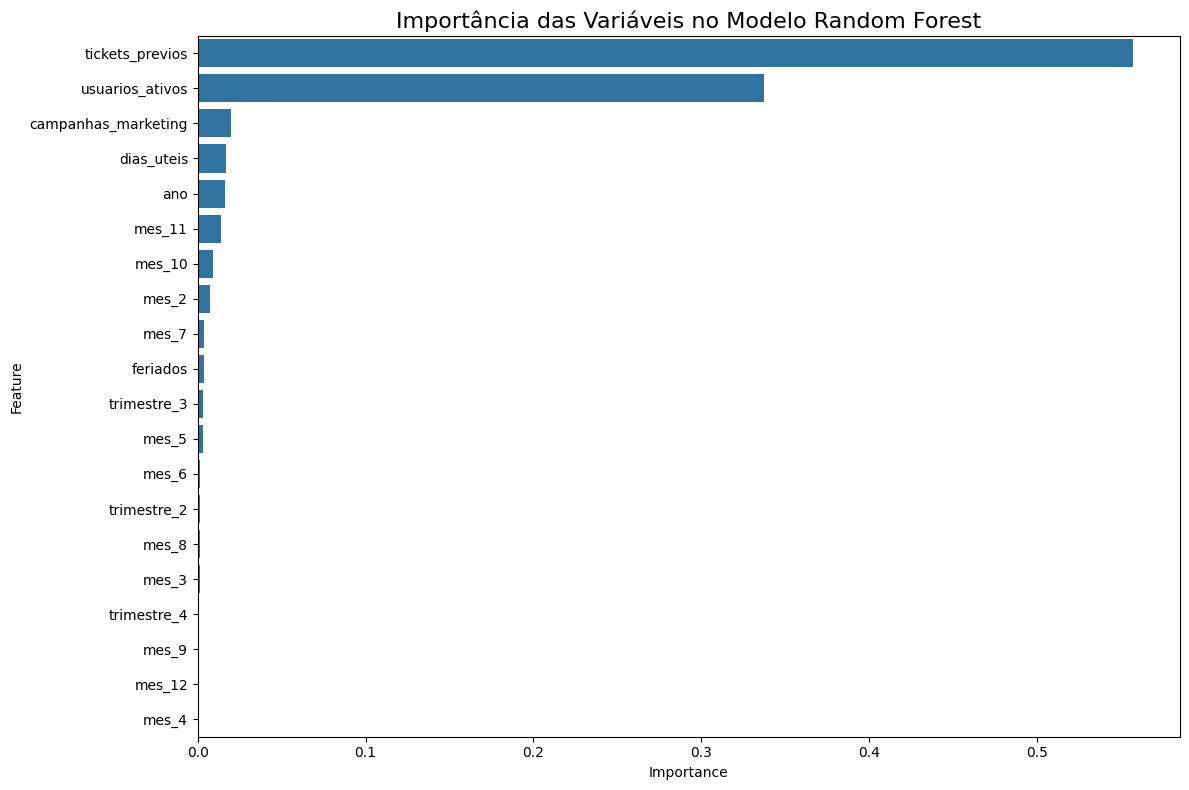

In [15]:
# Exibir importância das variáveis
feature_importance = pd.DataFrame({'Feature': X_train.columns, 
                                  'Importance': rf_model.feature_importances_})
feature_importance = feature_importance.sort_values('Importance', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Importância das Variáveis no Modelo Random Forest', fontsize=16)
plt.tight_layout()
plt.show()

## 6. Previsão para o Próximo Mês

In [16]:
# Criar dados para previsão do próximo mês (Junho/2024)
next_month = pd.DataFrame({
    'usuarios_ativos': [24200],
    'feriados': [1],
    'campanhas_marketing': [1],
    'tickets_previos': [601],  # valor de Maio/2024
    'dias_uteis': [20],
    'ano': [2024],
})

# Criar as mesmas colunas do conjunto de treinamento (mês e trimestre)
for col in X.columns:
    if col not in next_month.columns:
        if col == 'mes_6':  # Junho é o mês 6
            next_month[col] = 1
        elif col == 'trimestre_2':  # Junho está no trimestre 2
            next_month[col] = 1
        else:
            next_month[col] = 0

# Garantir a mesma ordem das colunas
next_month = next_month[X.columns]

# Previsão
next_month_prediction = rf_model.predict(next_month)[0]

print(f"Previsão de tickets para Junho/2024: {next_month_prediction:.0f}")

Previsão de tickets para Junho/2024: 571


## 7. Visualização da Série Temporal com Previsão

/var/folders/tw/3lp7x45j0fb0tbjmbhjxpbw40000gn/T/ipykernel_35357/2128582240.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.scatter(all_data.index[-1], all_data['tickets'][-1], s=120, color='#e74c3c')
/var/folders/tw/3lp7x45j0fb0tbjmbhjxpbw40000gn/T/ipykernel_35357/2128582240.py:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  xy=(all_data.index[-1], all_data['tickets'][-1]),


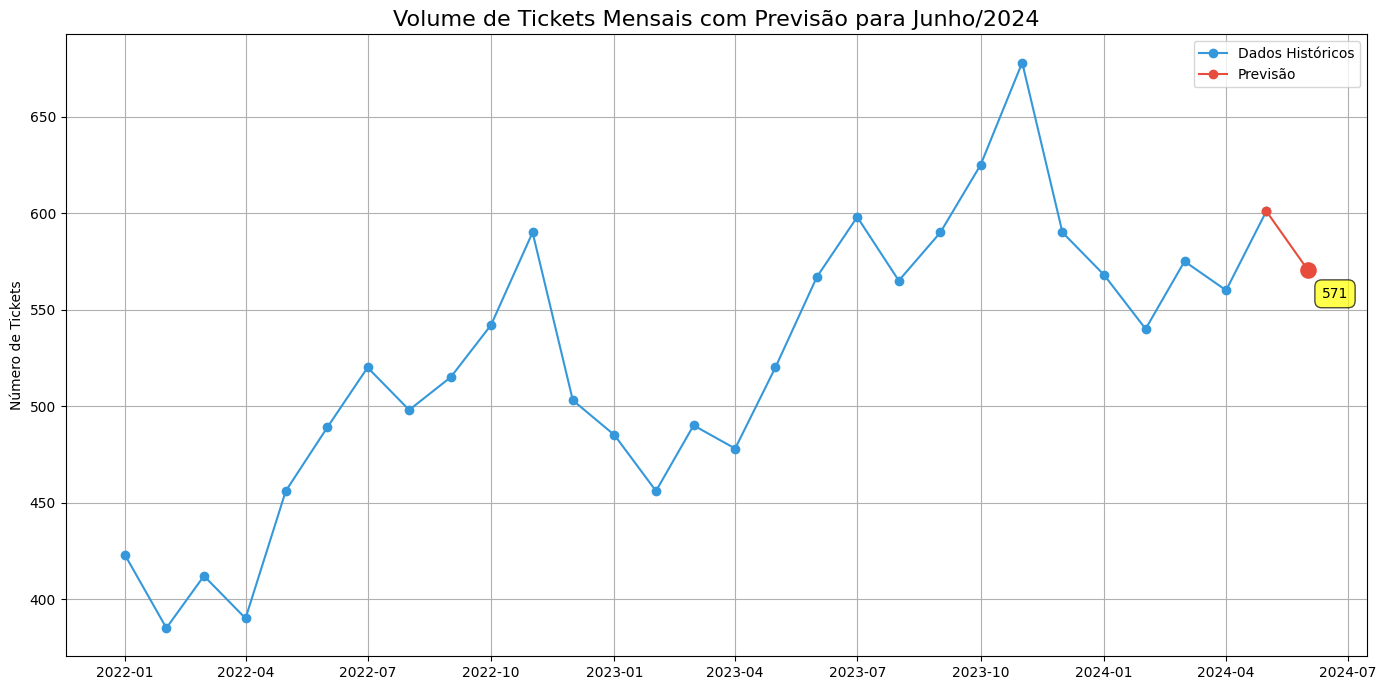

Resultados exportados para 'previsao_junho_2024.csv'


In [17]:
# Adicionar a previsão ao DataFrame original
future_date = pd.to_datetime('2024-06')
future_prediction = pd.DataFrame({'tickets': [next_month_prediction]}, index=[future_date])

# Concatenar com os dados históricos
all_data = pd.concat([df[['tickets']], future_prediction])

# Visualizar série temporal com previsão
plt.figure(figsize=(14, 7))
plt.plot(all_data.index[:-1], all_data['tickets'][:-1], marker='o', linestyle='-', label='Dados Históricos', color='#3498db')
plt.plot(all_data.index[-2:], all_data['tickets'][-2:], marker='o', linestyle='-', color='#e74c3c', label='Previsão')
plt.scatter(all_data.index[-1], all_data['tickets'][-1], s=120, color='#e74c3c')

# Adicionar anotação com o valor previsto
plt.annotate(f'{next_month_prediction:.0f}', 
             xy=(all_data.index[-1], all_data['tickets'][-1]),
             xytext=(10, -20),
             textcoords='offset points',
             bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.7))

plt.title('Volume de Tickets Mensais com Previsão para Junho/2024', fontsize=16)
plt.ylabel('Número de Tickets')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Exportar resultados
resultados = pd.DataFrame({
    'Data': [future_date],
    'Previsão de Tickets': [next_month_prediction]
})
resultados.to_csv('previsao_junho_2024.csv', index=False)
print("Resultados exportados para 'previsao_junho_2024.csv'")